## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env1 import TicTacToe 
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
env = TicTacToe()

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
np.random.seed(42)

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
max_epsilon = 1.0
min_epsilon = 0.001
#time = np.arange(0,5000000)
#epsilon = []
    
def epsilon_greedy(state, i):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]     #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
import collections 
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [9]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [[('x-x-x-x-x-x-x-x-x'),(0,5)],[('x-x-x-x-3-x-x-8-x'),(4,7)],[('x-7-x-2-x-x-x-x-x'),(2,3)],[('4-x-2-x-1-x-x-9-x'),(1,5)]]    
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()

In [13]:
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 5): []},
             'x-x-x-x-3-x-x-8-x': {(4, 7): []},
             'x-7-x-2-x-x-x-x-x': {(2, 3): []},
             '4-x-2-x-1-x-x-9-x': {(1, 5): []}})

#### Define hyperparameters  ---write your code here

In [14]:
EPISODES = 5000000
LR = 0.01                   #learning rate
GAMMA = 0.8
threshold = 20000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)

In [15]:
env.state

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

### Q-update loop ---write your code here

In [16]:
print(Q_dict)

defaultdict(<class 'dict'>, {})


In [17]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env.reset()
    while not env.is_terminal(env.state)[0]:
        curr_state = env.state
        curr_state_str = Q_state(curr_state)
        add_to_dict(curr_state)
        action = epsilon_greedy(curr_state,episode)
        next_state, reward, terminal_flag = env.step(curr_state,action)
        add_to_dict(next_state)
        if terminal_flag:
            Q_dict[curr_state_str][action] += LR*(reward-Q_dict[curr_state_str][action])
        else:
            max_next = max(Q_dict[Q_state(next_state)],key=Q_dict[Q_state(next_state)].get)
            Q_dict[curr_state_str][action] += LR*((reward+GAMMA*(Q_dict[Q_state(next_state)][max_next]))-Q_dict[curr_state_str][action])
            
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        print("saving state at episode "+str(episode))
        save_tracking_states()
        save_obj(States_track,'States_tracked') 

saving state at episode 19999
saving state at episode 39999
saving state at episode 59999
saving state at episode 79999
saving state at episode 99999
saving state at episode 119999
saving state at episode 139999
saving state at episode 159999
saving state at episode 179999
saving state at episode 199999
saving state at episode 219999
saving state at episode 239999
saving state at episode 259999
saving state at episode 279999
saving state at episode 299999
saving state at episode 319999
saving state at episode 339999
saving state at episode 359999
saving state at episode 379999
saving state at episode 399999
saving state at episode 419999
saving state at episode 439999
saving state at episode 459999
saving state at episode 479999
saving state at episode 499999
saving state at episode 519999
saving state at episode 539999
saving state at episode 559999
saving state at episode 579999
saving state at episode 599999
saving state at episode 619999
saving state at episode 639999
saving state 

In [18]:
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 5): [-0.9867219690399232,
               -0.9998669383812168,
               -0.9999988872299423,
               -1.0005415855517803,
               -1.0023546615709125,
               -1.0070557006110394,
               -1.0106862423092293,
               -1.0149361095232678,
               -1.017556071011426,
               -1.021597097506684,
               -1.0256860881708099,
               -1.0310279480009616,
               -1.0350107138900762,
               -1.0393620447433227,
               -1.0439784650827793,
               -1.0478147928453554,
               -1.0530452304786715,
               -1.0570641589558727,
               -1.0622611578681873,
               -1.0659848338704514,
               -1.0710521313982124,
               -1.0757276486172989,
               -1.0803973147835015,
               -1.084744872747946,
               -1.0892150059272614,
               -1.0947018082288489,
               -1.09

In [19]:

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

#### Check the Q-dictionary

In [20]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.2323812082346484,
              (0, 3): -0.9080295230953938,
              (0, 5): -1.35270371480591,
              (0, 7): -0.9156149365365466,
              (0, 9): -1.1076685653317833,
              (1, 1): -1.311453065571744,
              (1, 3): -1.300248374649217,
              (1, 5): 3.738869425958209,
              (1, 7): -1.3012517867080673,
              (1, 9): -1.27043463924743,
              (2, 1): -1.1309212832706779,
              (2, 3): -0.9257051763907516,
              (2, 5): -1.3387800051068428,
              (2, 7): -1.2063920043620224,
              (2, 9): 0.06751567737545743,
              (3, 1): -1.2666972139314896,
              (3, 3): -1.2107612330093824,
              (3, 5): -1.3301290311055833,
              (3, 7): -1.2735328143778208,
              (3, 9): -1.3012342267696826,
              (4, 1): -1.3399745857281091,
              (4, 3): -1.3229312453397655,
              (4, 5): -

In [44]:
len(Q_dict)

2321573

In [22]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
## below indicates (1,5) action is best. It is indeed true as it will win game for agent.
Q_dict['4-x-2-x-1-x-x-9-x']

{(1, 3): 0,
 (1, 5): 1.2247897700103203,
 (1, 7): 0,
 (3, 3): 0,
 (3, 5): -0.1,
 (3, 7): -0.01,
 (5, 3): -0.0092,
 (5, 5): -0.01,
 (5, 7): 0,
 (6, 3): 0,
 (6, 5): -0.01,
 (6, 7): 0,
 (8, 3): 0,
 (8, 5): 0,
 (8, 7): 0}

In [27]:
Q_dict['3-x-6-x-5-x-x-x-8']

{(1, 1): -0.1,
 (1, 7): -0.01,
 (1, 9): -0.1,
 (3, 1): -0.0199,
 (3, 7): -0.01,
 (3, 9): -0.01,
 (5, 1): 0.1,
 (5, 7): 0,
 (5, 9): 0,
 (6, 1): 0,
 (6, 7): 0,
 (6, 9): 0,
 (7, 1): 0,
 (7, 7): 0,
 (7, 9): -0.1}

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [ ]:
# Write the code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(close=None, block=None)>

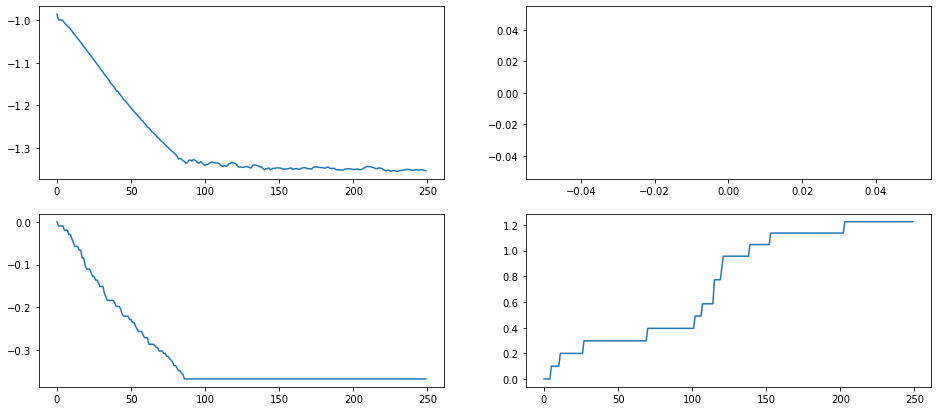

In [24]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(0,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(0,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-3-x-x-8-x'][(4,7)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-3-x-x-8-x'][(4,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-7-x-2-x-x-x-x-x'][(2,3)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-7-x-2-x-x-x-x-x'][(2,3)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['4-x-2-x-1-x-x-9-x'][(1,5)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['4-x-2-x-1-x-x-9-x'][(1,5)]))
plt.show

### Epsilon - decay check

In [25]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

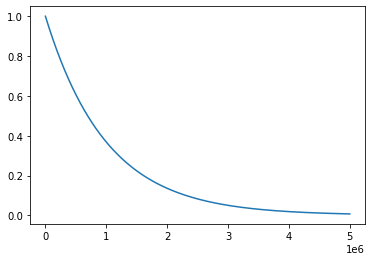

In [26]:
plt.plot(time, epsilon)
plt.show()